In [47]:
%matplotlib inline
import os
import numpy as np
import joblib

import matplotlib.pyplot as plt

# REV analysis

After running REV.py script. you will have two dictionaries in the specified output directory.
You can then use those file to plot correlation function curves which can be then interpreted and analyzed to determine REV size for a 3D volume.

In [51]:
output_dir = r"D:\Hamed\SliceGAN-V1.1\training-runs" # replace this path with your output folder
# print(output_dir)
s2_3d_dict = joblib.load(os.path.join(output_dir, 's2_3d_dict.pkl'))
f2_3d_dict = joblib.load(os.path.join(output_dir, 'f2_3d_dict.pkl'))

In [52]:
f2_3d_dict.keys(), s2_3d_dict.keys()

(dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_350', 'original']),
 dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_350', 'original']))

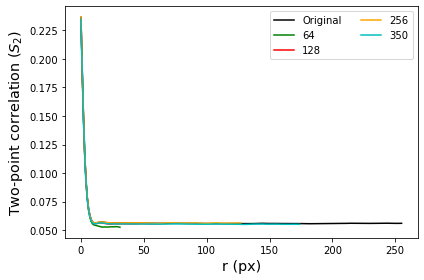

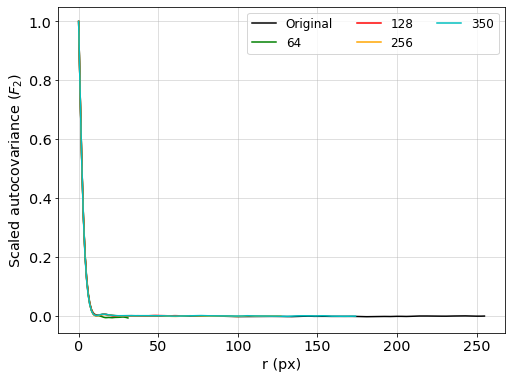

In [53]:
plt.figure()
plt.plot(s2_3d_dict['original'], 'k', label = 'Original')
plt.plot(s2_3d_dict['sub_64']['s2']['mean'], 'g', label = '64')
plt.plot(s2_3d_dict['sub_128']['s2']['mean'], 'r', label = '128')
plt.plot(s2_3d_dict['sub_256']['s2']['mean'], 'orange', label = '256')
plt.plot(s2_3d_dict['sub_350']['s2']['mean'], 'c', label = '350')

plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('Two-point correlation ($S_2$)', fontsize = 'x-large')

plt.legend(ncol =2)
plt.tight_layout()
plt.show()


plt.figure(figsize= (8, 6))
plt.plot(f2_3d_dict['original'], 'k', label = 'Original')
plt.plot(f2_3d_dict['sub_64']['f2']['mean'], 'g', label = '64')
plt.plot(f2_3d_dict['sub_128']['f2']['mean'], 'r', label = '128')
plt.plot(f2_3d_dict['sub_256']['f2']['mean'], 'orange', label = '256')
plt.plot(f2_3d_dict['sub_350']['f2']['mean'], 'c', label = '350')


plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('Scaled autocovariance ($F_2$)', fontsize = 'x-large')
plt.grid(alpha = 0.5)
plt.tick_params(labelsize = 'x-large')
plt.legend(ncol =3, fontsize = 'large')
plt.show()

In [18]:
run_path = r'D:\Hamed\SliceGAN-V1.1\training-runs\009_RES_384_ImgSize_256_BatchSize_2_D_batch_size_2_Lrg_0.0001_LrD_0.0001_Lambda_10'
mse_dict = joblib.load(os.path.join(run_path,'mse_dict.pkl'))
losses_dict = joblib.load(os.path.join(run_path, 'disc_losses.pkl'))

In [19]:
losses_dict['gen']

[104.34253692626953,
 1580.4503173828125,
 1791.279541015625,
 1775.99072265625,
 2121.6064453125,
 1783.875,
 728.0927734375,
 1151.7825927734375,
 1583.531982421875,
 1314.212890625,
 1266.718017578125,
 1235.841796875,
 984.716064453125,
 1272.545654296875,
 1474.8267822265625,
 1507.232666015625,
 1261.77685546875,
 1284.102294921875,
 1445.5316162109375]

In [12]:
float(losses_dict['gen'][0])

72.19456481933594

In [13]:
losses_dict.keys()

dict_keys(['gen', '3disc_loss_real', '3disc_loss_gen'])

In [20]:
len(losses_dict['3disc_loss_real']), len(losses_dict['3disc_loss_gen']), len(losses_dict['gen'])

(19, 19, 19)

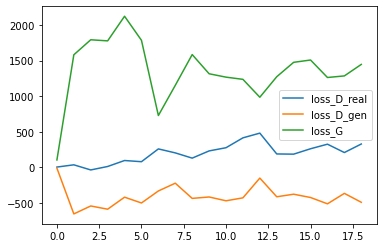

In [21]:
plt.figure()
plt.plot(losses_dict['3disc_loss_real'], label = 'loss_D_real')
plt.plot(losses_dict['3disc_loss_gen'], label = 'loss_D_gen')
plt.plot(losses_dict['gen'], label = 'loss_G')

plt.legend()
plt.show()

